In [1]:
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt

# Exercise 4: Introducing uncertainty

Consider the model with uncertainty:
$$\begin{align*}
    V_{t}(W_{t}) & = \max_{0\le c_{t}\le W_t}\left\{ \sqrt{c_{t}} + \beta \sum_{i=1}^K \pi_i V_{t+1}(W_t-c_t+\varepsilon_i)  \right\} \\

\epsilon & \text{ uniform on } \{0,1,2,\dots,K-1 \} \text{ with probability } \pi_i\ge 0, i=1,\dots,K
\end{align*}$$
for $T=10$, $\beta=0.90$ and $W_{1}=10$. Assume $\epsilon$ follows a discrete, uniform distribution with $K=5$ and $\Rightarrow \epsilon_{i} \in (0,1,2,3,4)$

### 1. Solve the finite horizon model with uncertainty using *backward induction*, *grid search*, and *linear interpolation* in $\texttt{Exercise\_4.py}$

In [5]:
# setup specifications in class. 
class par: pass
par.beta = 0.90
par.W = 10
par.T = 10
par.K = 5
# FILL IN. Hint: use model description
par.eps = None
par.pi = None

### SOLUTION ###
par.eps = np.arange(par.K)
par.pi = np.ones(par.K)*(1/par.K)
### SOLUTION ###

# grids
par.num_W = 200
par.num_C = 200

In [6]:
# load modules related to this exercise
import Exercise_4 as ex4

# Solve the model
sol = ex4.solve_consumption_uncertainty(par)

### 2. Plot the value function and the consumption function for $t=1$. Make sure that both functions are increasing in $W$.

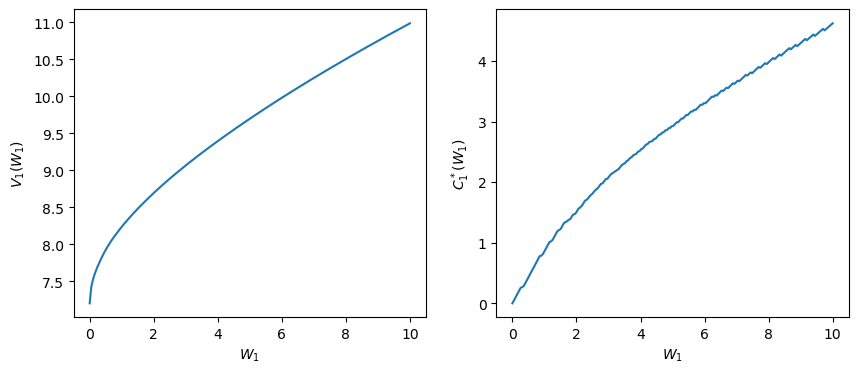

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(sol.grid_W[:,0],sol.V[:,0])
ax[0].set_xlabel("$W_1$")
ax[0].set_ylabel("$V_1(W_1)$")

ax[1].plot(sol.grid_W[:,0],sol.C[:,0])
ax[1].set_xlabel("$W_1$")
ax[1].set_ylabel("$C_1^*(W_1)$");

### 3. Compare the value function and consumption function from ex. 1 with a deterministic model.
Compare with a model with no income growth, and with a model with a deterministic income growth of 2 in each period (as this is the average stochastic income growth).

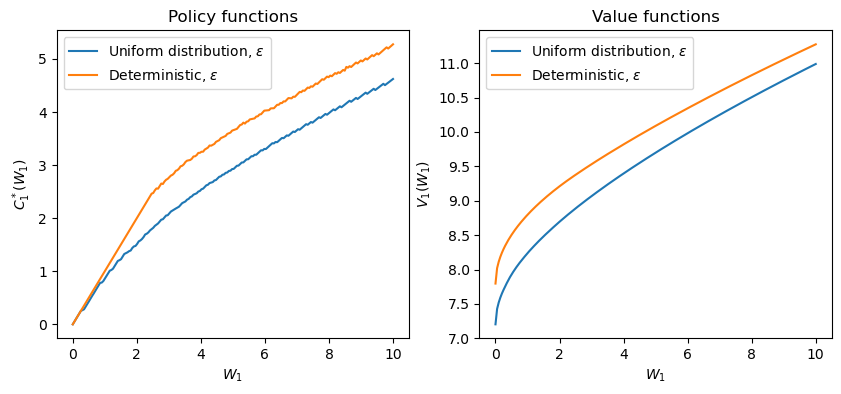

In [ ]:
class par_fixed(par): pass  # Create a copy of the class

# FILL IN. Hint: How can you easily use the existing function in exercise_4.py? Maybe changing the probabilities?
par_fixed.pi = [None, None, None, None, None]

### SOLUTION ###
par_fixed.pi = [0, 0, 1, 0, 0]
### SOLUTION ###

sol_fixed = ex4.solve_consumption_uncertainty(par_fixed)

# Compare 
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_title('Policy functions')
ax[0].plot(sol.grid_W[:,0],sol.C[:,0], label=r'Uniform distribution, $\epsilon$',)
ax[0].plot(sol_fixed.grid_W[:,0],sol_fixed.C[:,0], label=r'Deterministic, $\epsilon$')
ax[0].set_ylabel('$C_1^*(W_1)$')
ax[0].set_xlabel('$W_1$')
ax[0].legend()

ax[1].set_title('Value functions')
ax[1].plot(sol.grid_W[:,0],sol.V[:,0], label=r'Uniform distribution, $\epsilon$')
ax[1].plot(sol_fixed.grid_W[:,0],sol_fixed.V[:,0], label=r'Deterministic, $\epsilon$')
ax[1].set_ylabel('$V_1(W_1)$')
ax[1].set_xlabel('$W_1$')
ax[1].legend();

### 4. Re-solve the model assuming that $\pi = [0.05, 0.05, 0.8, 0.05, 0.05]$. How does the solution compare to the model with uniform uncertainty? 

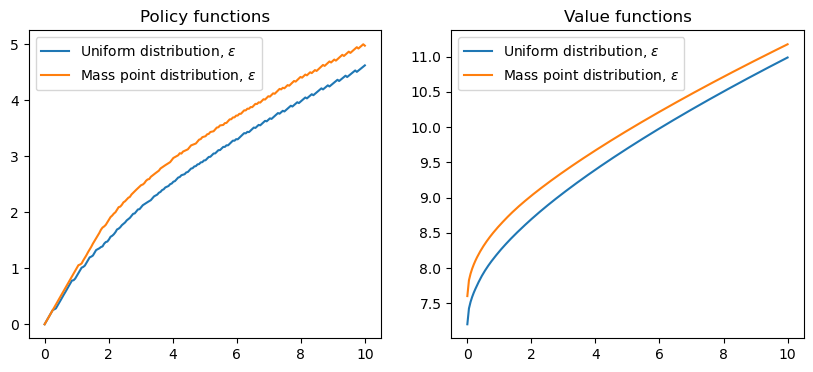

In [ ]:
class par_mass(par): pass 

# FILL IN. Delete "None"
par_mass.pi = [None, None, None, None, None]

### SOLUTION ###
par_mass.pi = [0.05, 0.05, 0.8, 0.05, 0.05]
### SOLUTION ###

sol_mass = ex4.solve_consumption_uncertainty(par_mass)

# Compare 
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_title('Policy functions')
ax[0].plot(sol.grid_W[:,0],sol.C[:,0], label=r'Uniform distribution, $\epsilon$')
ax[0].plot(sol_mass.grid_W[:,0],sol_mass.C[:,0], label=r'Mass point distribution, $\epsilon$')
ax[0].legend()

ax[1].set_title('Value functions')
ax[1].plot(sol.grid_W[:,0],sol.V[:,0], label=r'Uniform distribution, $\epsilon$')
ax[1].plot(sol_mass.grid_W[:,0],sol_mass.V[:,0], label=r'Mass point distribution, $\epsilon$')
ax[1].legend();

### 5. Simulate a panel of *10,000* household for *10* periods and plot the mean of $C_t$. 
Everybody should be initialized with $W_1 = 10$. Simulate using the solution from question 1 (with uniform shocks) and the solution from question 4 (with probability mass clustered around $\epsilon_i=2$). What is the intuition of the graphs?

In [ ]:
# simulate 
np.random.seed(2026)  # Seed value, it ensures that the computer draw the same pseudo-random-numbers each time

# define function for simulation
def simulate(sol, par, sim):
    
    # 1. allocate memory
    W = np.zeros((sim.simN, sim.T)) + np.nan
    C = np.zeros((sim.simN, sim.T)) + np.nan

    # 2. simulate
    W[:, 0] = sim.W_ini
    for t in range(par.T):

        # FILL IN
        # Hint: 1) Interpolate policy function in sol to get consumption, use np.interp
        #       2) Draw shocks with np.random.choice, see numpy docs
        #       3) Handle state transition

        ### SOLUTION ###
        C[:, t] = np.interp(W[:, t], sol.grid_W[:, t], sol.C[:, t])
        eps = np.random.choice(par.eps, size=sim.simN, p=par.pi)
        if t < par.T-1:
            W[:, t+1] = W[:, t] - C[:, t] + eps
        ### SOLUTION ###
    
    # 3. compute mean
    # FILL IN. Hint: Compute mean over cross-sectional dimension

    ### SOLUTION ###
    mean = np.mean(C, axis=0)
    ### SOLUTION ###
        
    return mean

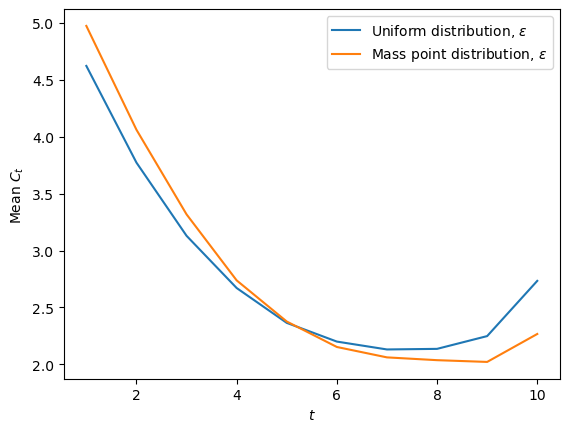

In [41]:
class sim: pass
sim.simN = 10000
sim.W_ini = 10
sim.T = 10
sim.T_grid = range(1,sim.T+1)

sim_uni = simulate(sol,par,sim)
sim_mass = simulate(sol_mass,par_mass,sim)

f, ax = plt.subplots()

ax.plot(sim.T_grid,sim_uni, label=r'Uniform distribution, $\epsilon$')
ax.plot(sim.T_grid,sim_mass, label=r'Mass point distribution, $\epsilon$')
ax.set_ylabel('Mean $C_t$')
ax.set_xlabel('$t$')
ax.legend();

What do you attribute differences to?